# Importing all required libraries and loading my dataset

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [4]:
# Load the dataset
data = pd.read_csv('Ecommerce-Data.csv')

# Preview the dataset
data.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [7]:
# Data Overview
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [9]:
print("\nBasic Statistics:")
data.describe(include='all')


Basic Statistics:


,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730,15730.000000,15204,15730,15730.000000,15730.000000,15730,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
unique,NaN,4782,NaN,2,2,NaN,NaN,2530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Flip Flops,NaN,Women,Flipkart,NaN,NaN,50.05%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,495,NaN,8781,15389,NaN,NaN,575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10479.541577,NaN,4.012873,NaN,NaN,688.070693,1369.286777,NaN,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,NaN,0.298440,NaN,NaN,649.409586,1240.900227,NaN,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,NaN,0.000000,NaN,NaN,69.000000,42.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,NaN,3.900000,NaN,NaN,349.000000,699.000000,NaN,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,NaN,4.000000,NaN,NaN,474.000000,999.000000,NaN,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,NaN,4.200000,NaN,NaN,699.000000,1299.000000,NaN,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000


## Check for any Null Values

In [12]:
# Handling Missing Values
missing_summary = data.isnull().sum()
print("Missing Values per Column:\n", missing_summary)

# Example: Filling missing values in `maincateg`
data['maincateg'].fillna('Unknown', inplace=True)

# Converting 'Offer %' to numeric
data['Offer %'] = data['Offer %'].str.replace('%', '').astype(float)

# Drop or fill other missing values as necessary
data.fillna(0, inplace=True)

Missing Values per Column:
 id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64


C:\Users\rushi\AppData\Local\Temp\ipykernel_17764\4064539296.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['maincateg'].fillna('Unknown', inplace=True)


# Summarization:

In [15]:
print('Sum of Prices: ',data['price1'].sum())

Sum of Prices:  10823352


In [17]:
print('Mean Price: ',data['price1'].mean())

Mean Price:  688.0706929434202


In [19]:
print('Median Price: ',data['price1'].median())

Median Price:  474.0


In [21]:
print('Minimum Price: ',data['price1'].min())

Minimum Price:  69


In [23]:
print('Maximum Price: ',data['price1'].max())

Maximum Price:  5998


# Counting:

In [26]:
print('Count of Entries: ',data['maincateg'].count())

Count of Entries:  15730


In [28]:
print('Unique Categories: ',data['maincateg'].nunique())

Unique Categories:  3


# Statistics:

In [31]:
print('Standard Deviation of Prices: ',data['price1'].std())

Standard Deviation of Prices:  649.409586038453


In [33]:
print('Variance of Prices: ',data['price1'].var())

Variance of Prices:  421732.8104386349


In [35]:
print('25th Percentile of Prices: ',data['price1'].quantile(0.25))

25th Percentile of Prices:  349.0


# Grouped Aggregations:

In [38]:
average_price = data.groupby('maincateg')['price1'].mean()
print('Average Price by Main Category: ',average_price)

Average Price by Main Category:  maincateg
Men        738.710416
Unknown    698.682510
Women      650.393805
Name: price1, dtype: float64


In [40]:
count_by_category = data.groupby('maincateg').size()
print('Total Count of Items by Category: ',count_by_category)

Total Count of Items by Category:  maincateg
Men        6423
Unknown     526
Women      8781
dtype: int64


In [42]:
#Here we can Add the new Discount amount table in the table 

data['Discount_Amount'] = data['actprice1'] - data['price1']
data.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Discount_Amount
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13,38.0,7.0,17.0,9.0,6.0,3,3,0,301
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03,531.0,69.0,264.0,92.0,73.0,29,73,1,1000
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01,17.0,4.0,11.0,3.0,2.0,1,0,1,2250
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,206
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02,77.0,3.0,35.0,21.0,7.0,7,7,1,920


# Data Visualization

### -Distribution of Ratings

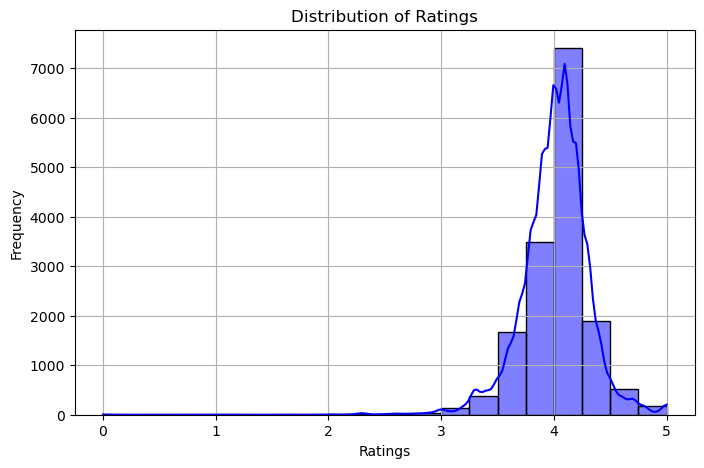

In [46]:
# 1. Histogram: Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.grid()
plt.show()

### -Price vs. Ratings

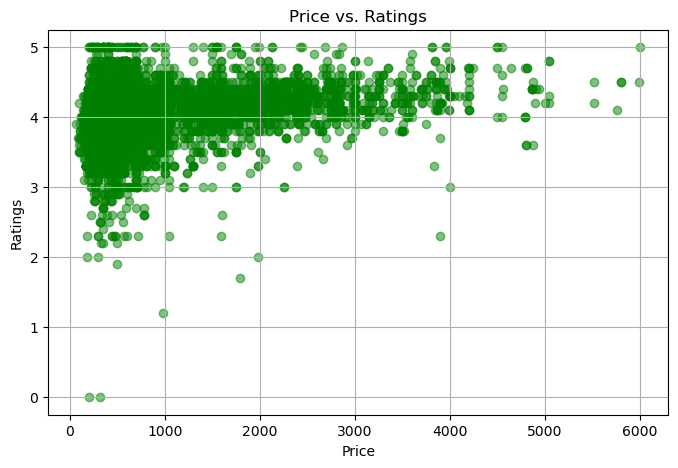

In [49]:
# 2. Scatter Plot: Price vs. Ratings
plt.figure(figsize=(8, 5))
plt.scatter(data['price1'], data['Rating'], alpha=0.5, c='green')
plt.title("Price vs. Ratings")
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.grid()
plt.show()

### -Offers Distribution by Category

C:\Users\rushi\AppData\Local\Temp\ipykernel_17764\689985372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='maincateg', y='Offer %', data=data, palette='muted')


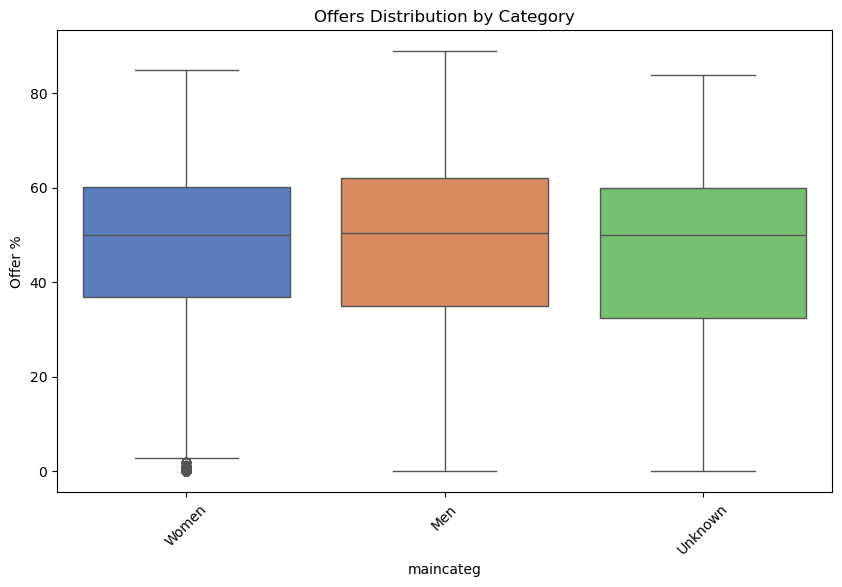

In [52]:
# 3. Box Plot: Offers by Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='maincateg', y='Offer %', data=data, palette='muted')
plt.title("Offers Distribution by Category")
plt.xticks(rotation=45)
plt.show()


### -Product Counts by Category

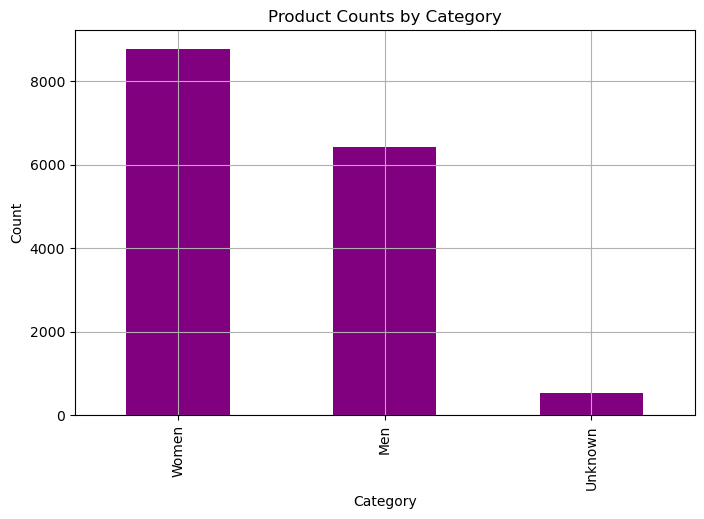

In [55]:
# 4. Bar Chart: Product Counts by Category
plt.figure(figsize=(8, 5))
category_counts = data['maincateg'].value_counts()
category_counts.plot(kind='bar', color='purple')
plt.title("Product Counts by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid()
plt.show()

### -Heatmap of Numerical Features

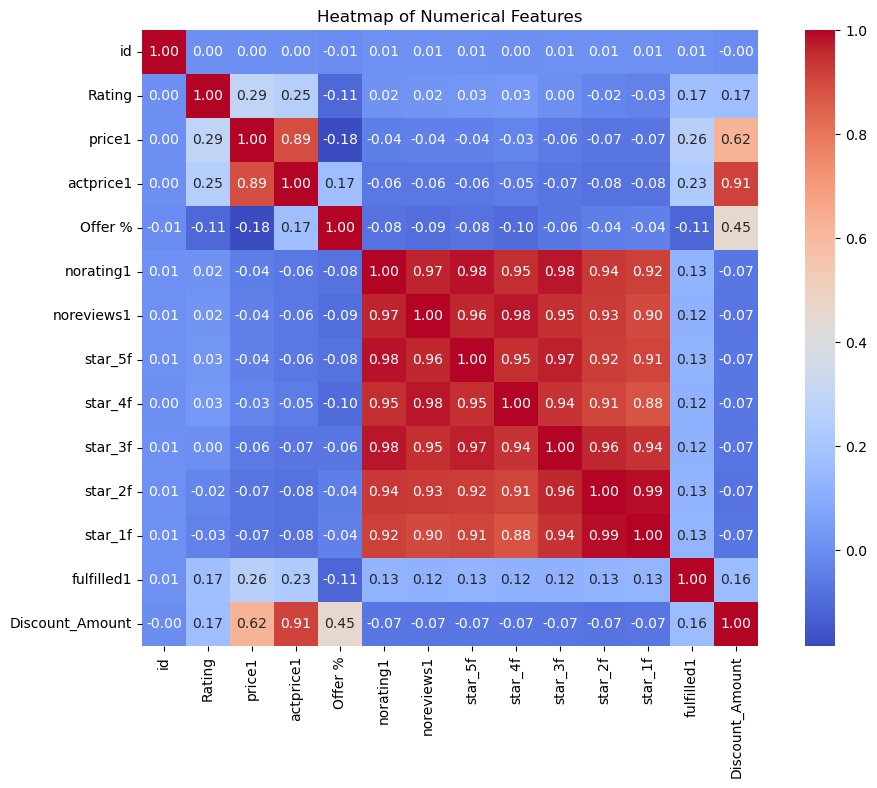

In [58]:
# 5. Heatmap: Correlation of Numerical Features
plt.figure(figsize=(12, 8))
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(data[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap of Numerical Features")
# plt.grid()
plt.show()

### -Cumulative Ratings Trend

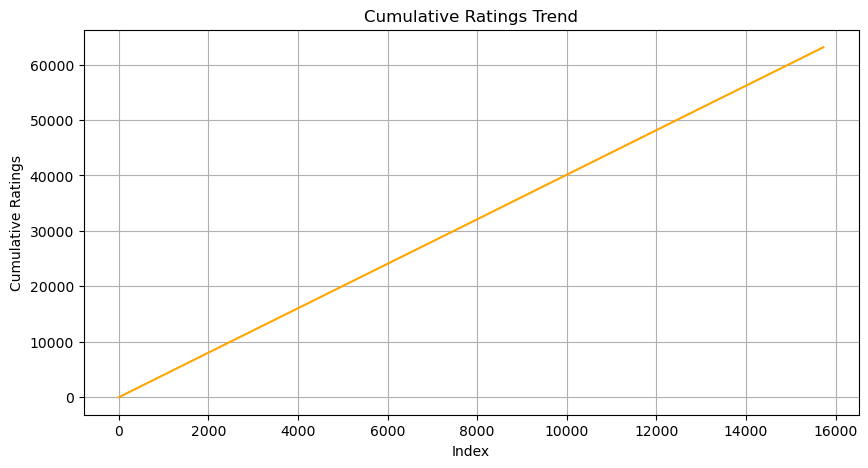

In [61]:
# 6. Line Chart: Cumulative Ratings Trend
data['cumulative_ratings'] = data['Rating'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(data['cumulative_ratings'], color='orange')
plt.title("Cumulative Ratings Trend")
plt.xlabel("Index")
plt.ylabel("Cumulative Ratings")
plt.grid()
plt.show()

### -Proportion of Categories

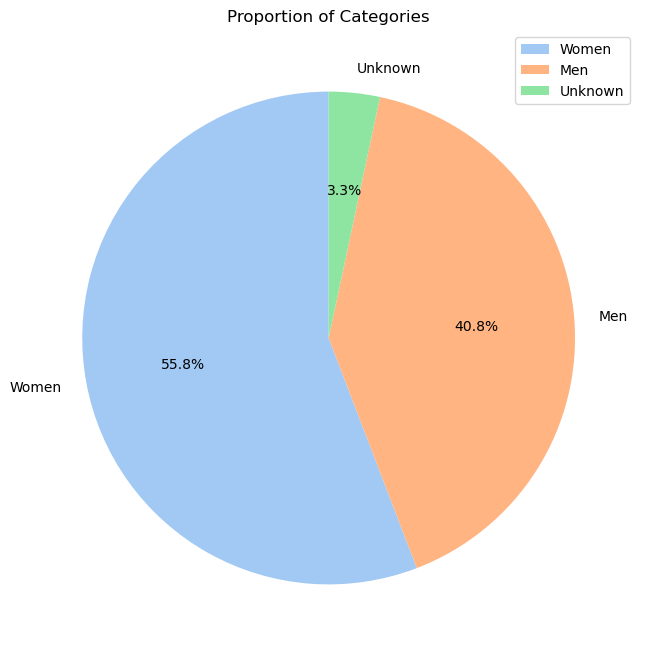

In [64]:
# 7. Pie Chart: Category Proportions
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Proportion of Categories")
plt.ylabel("")
plt.legend(["Women", "Men","Unknown"])
plt.show()


### -Price Distribution by Platform

C:\Users\rushi\AppData\Local\Temp\ipykernel_17764\3699751450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='platform', y='price1', data=data, palette='coolwarm')


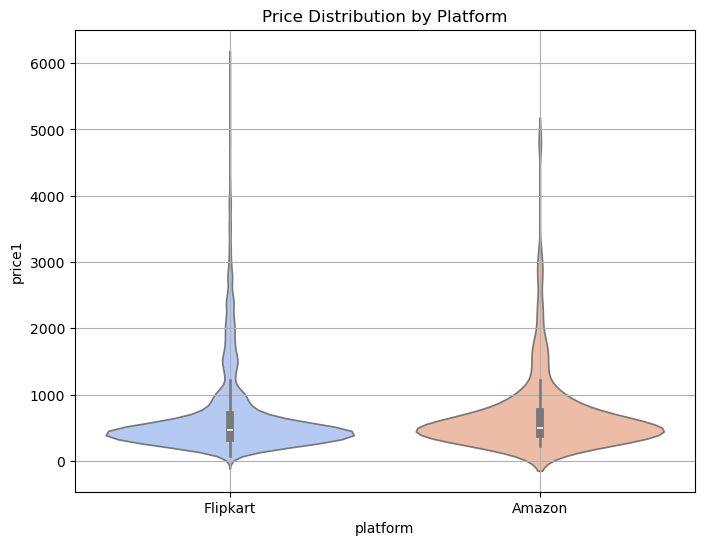

In [67]:
# 8. Violin Plot: Price Distribution by Platform
plt.figure(figsize=(8, 6))
sns.violinplot(x='platform', y='price1', data=data, palette='coolwarm')
plt.title("Price Distribution by Platform")
plt.grid()
plt.show()

### -Fulfillment Status by Categories

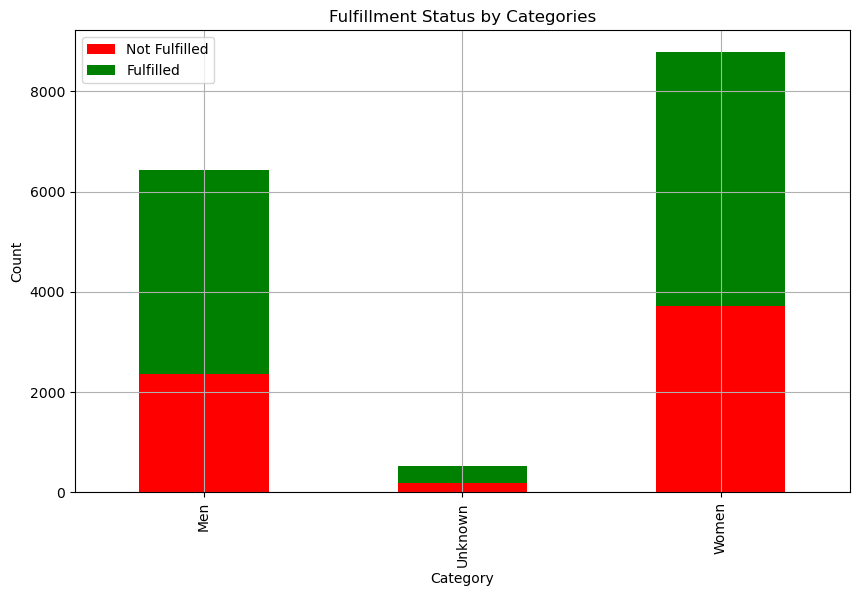

In [70]:
# 9. Stacked Bar Chart: Fulfillment Status by Categories
fulfillment_status = pd.crosstab(data['maincateg'], data['fulfilled1'])
fulfillment_status.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title("Fulfillment Status by Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(["Not Fulfilled", "Fulfilled"])
plt.grid()
plt.show()

### -Ratings vs. Reviews by Platform

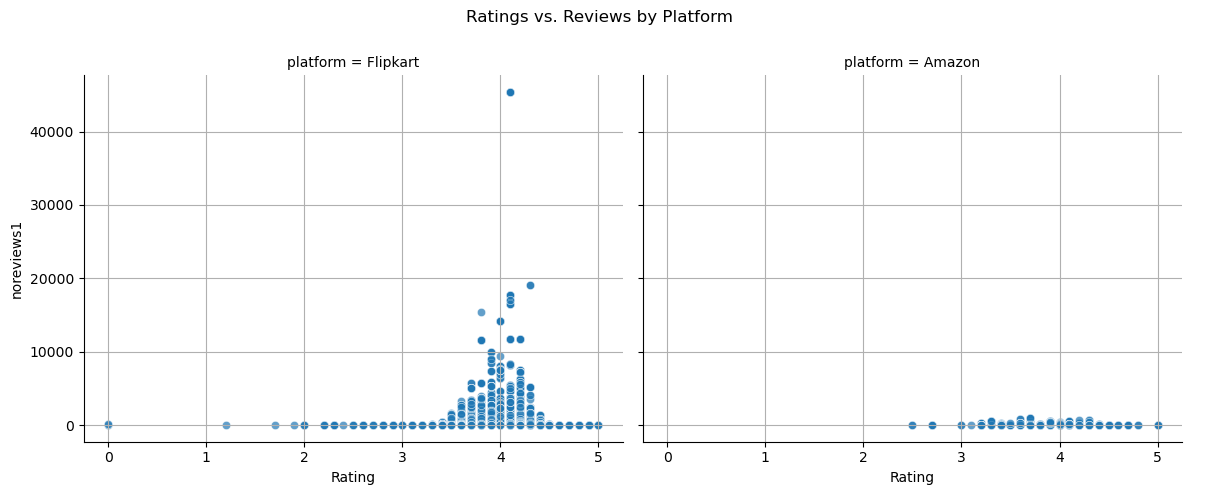

In [73]:
# 10. Facet Grid: Ratings vs. Reviews by Platform
g = sns.FacetGrid(data, col="platform", height=5, aspect=1.2)
g.map(sns.scatterplot, "Rating", "noreviews1", alpha=0.7)

# Add grid to each subplot
for ax in g.axes.flat:
    ax.grid(True)

g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Ratings vs. Reviews by Platform")
plt.show()


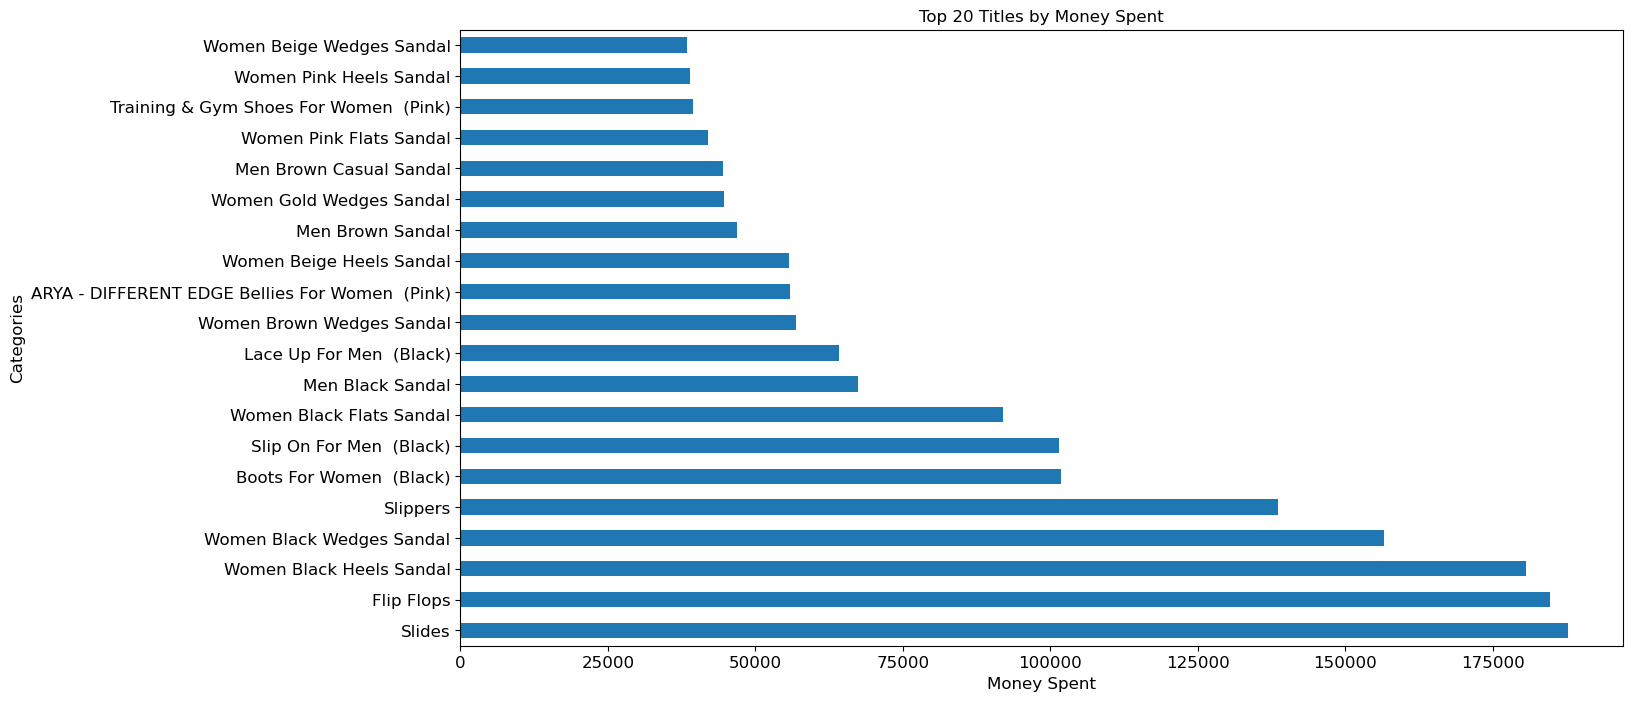

In [75]:
group_title = data.groupby('title')['price1'].sum().sort_values(ascending=False)

# Display only the first 20 records
top_20_titles = group_title.head(20)

plt.subplots(figsize=(15, 8))
top_20_titles.plot(kind='barh', fontsize=12)

# Update axis labels and title
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.title('Top 20 Titles by Money Spent', fontsize=12)

# Show the plot
plt.show()

